# ライブラリの読み込み

In [1]:
import pandas as pd
import numpy as np

# 気温情報の取り込み

以下のURLより4/1〜8/11までの東京の気温をダウンロード

http://www.data.jma.go.jp/gmd/risk/obsdl/index.php

- データをUTF-8にする

In [2]:
temp_df = pd.read_csv("data.csv")
type(temp_df)
temp_df.shape

(3191, 4)

In [3]:
temp_df.head(10)
#temp_df.tail(10)

,年月日時,気温(℃),品質情報,均質番号
0,2016/4/1 1:00:00,13.3,8,1
1,2016/4/1 2:00:00,13.8,8,1
2,2016/4/1 3:00:00,13.0,8,1
3,2016/4/1 4:00:00,12.2,8,1
4,2016/4/1 5:00:00,11.2,8,1
5,2016/4/1 6:00:00,10.8,8,1
6,2016/4/1 7:00:00,12.1,8,1
7,2016/4/1 8:00:00,13.8,8,1
8,2016/4/1 9:00:00,15.3,8,1
9,2016/4/1 10:00:00,16.7,8,1


# 電力需要データの取り込み

以下のURLより東京電力の電力需要データをダウンロード

http://www.tepco.co.jp/forecast/html/download-j.html

- データをUTF-8にする

In [4]:
kw_df = pd.read_csv("juyo-2016.csv")

In [5]:
kw_df.head(10)
#kw_df.tail(10)

,DATE,TIME,実績(万kW)
0,2016/4/1,1:00,2426
1,2016/4/1,2:00,2386
2,2016/4/1,3:00,2368
3,2016/4/1,4:00,2382
4,2016/4/1,5:00,2459
5,2016/4/1,6:00,2623
6,2016/4/1,7:00,2767
7,2016/4/1,8:00,2956
8,2016/4/1,9:00,3149
9,2016/4/1,10:00,3201


# データ加工

- 需要データに気温データを追加

In [6]:
df = kw_df
df["気温"] = temp_df["気温(℃)"]

In [7]:
df.head(10)

,DATE,TIME,実績(万kW),気温
0,2016/4/1,1:00,2426,13.3
1,2016/4/1,2:00,2386,13.8
2,2016/4/1,3:00,2368,13.0
3,2016/4/1,4:00,2382,12.2
4,2016/4/1,5:00,2459,11.2
5,2016/4/1,6:00,2623,10.8
6,2016/4/1,7:00,2767,12.1
7,2016/4/1,8:00,2956,13.8
8,2016/4/1,9:00,3149,15.3
9,2016/4/1,10:00,3201,16.7


- 曜日データを追加

In [8]:
import datetime

pp = df["DATE"]
tmp = []

for i in range(len(pp)):
    #print(pp[i])
    d = datetime.datetime.strptime(pp[i], "%Y/%m/%d")
    tmp.append(d.weekday())
    
#tmp
df["weekday"] = tmp

- 時間データを追加

In [9]:
pp = df["TIME"]
tmp = []

for i in range(len(pp)):
    d = datetime.datetime.strptime(pp[i], "%H:%M")
    tmp.append(d.hour)
    
#tmp
df["hour"] = tmp

In [10]:
df.head(10)

,DATE,TIME,実績(万kW),気温,weekday,hour
0,2016/4/1,1:00,2426,13.3,4,1
1,2016/4/1,2:00,2386,13.8,4,2
2,2016/4/1,3:00,2368,13.0,4,3
3,2016/4/1,4:00,2382,12.2,4,4
4,2016/4/1,5:00,2459,11.2,4,5
5,2016/4/1,6:00,2623,10.8,4,6
6,2016/4/1,7:00,2767,12.1,4,7
7,2016/4/1,8:00,2956,13.8,4,8
8,2016/4/1,9:00,3149,15.3,4,9
9,2016/4/1,10:00,3201,16.7,4,10


# 学習データの作成

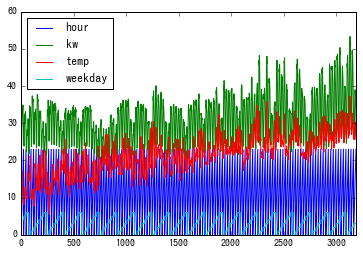

In [11]:
# データを可視化して確認

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'family':'IPAGothic'}
matplotlib.rc('font', **font)

#pp = df[[3, 4, 5, 2]]
pp = pd.DataFrame({'temp': df["気温"], 'kw': df["実績(万kW)"] / 100, "weekday": df["weekday"], "hour": df["hour"]})

wk = 1500
#pp[wk:wk + 150].plot()
pp.plot()

In [12]:
# 気温あり
pp = df[[3, 4, 5]]

# 気温なし
#pp = df[[4, 5]]


X = pp.as_matrix().astype('float')
X.shape

(3191, 3)

In [13]:
pp = df[[2]]
y = pp.as_matrix().flatten()
y.shape

(3191,)

- ラベル付きデータをトトレーニングセットとテストセットに分割する

In [14]:
# モジュールを読み込む
from sklearn import cross_validation

# ラベル付きデータをトレーニングセット (X_train, y_train)とテストセット (X_test, y_test)に分割
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.2, random_state=42)
X_train.std()

9.1252493180204706

## 正規化

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.std()

0.99999999999999978

# 機械学習

In [18]:
# モジュールの読み込み
from sklearn import svm
model = svm.SVC()

#from sklearn import ensemble
#model = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10)

In [19]:
# 学習
model.fit(X_train, y_train)
# model.score(X,y)を使って予測精度を出す
print(model.score(X_test,y_test))

0.00312989045383


In [20]:
# テスト結果の表示
result = model.predict(X_test)
#print(result)
result.shape

#print(y_test)
#y_test_pred = model.predict(X_test)
#X_test
#X_test.shape
#type(X_test)

(639,)

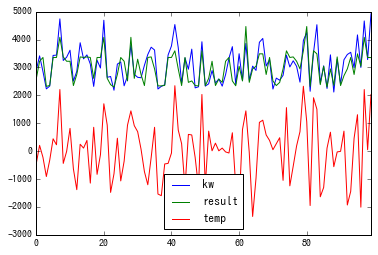

In [21]:
# 温度を加味したグラフ
pp = pd.DataFrame({'temp':X_test[:,0] * 1000, 'kw': np.array(y_test), "result": np.array(result)})
pp[:100].plot()

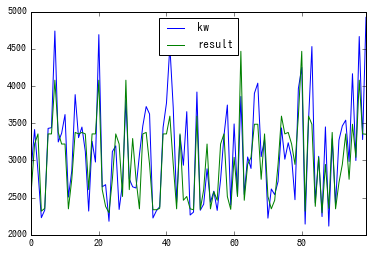

In [22]:
# 温度を加味しないグラフ
#type(X_test[:,2])
#type(np.array(y_test))

pp = pd.DataFrame({'kw': np.array(y_test), "result": np.array(result)})
pp[:100].plot()

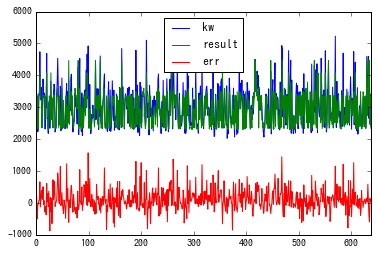

In [25]:
# 誤差計算
pp = pd.DataFrame({'kw': np.array(y_test), "result": np.array(result)})
pp["err"] = pp["kw"] - pp["result"]

pp.plot()
#x = 200
#pp[x:x+100].plot()

In [24]:
emax = 0
emin = 50000
eave = 0

for i in range(len(pp)):
    if emax < pp["err"][i]:
        emax = pp["err"][i]
    if emin > pp["err"][i]:
        emin = pp["err"][i]
    eave += pp["err"][i]

print(emax)
print(emin)
print(eave / i)

1571
-879
114.81661442
